In [2]:
import numpy as np
#import merg_rates
import h5py
from progressbar import ProgressBar
#from wetzel_utils.utility.utility_catalog import indices_tree

In [3]:
import matplotlib as mpl 
mpl.use('Agg')
import matplotlib.pyplot as plt 
from matplotlib import rcParams
%matplotlib inline

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [ ]:
tpm0=merg_rates.shamedTreepmClass(scat=0.)
tpm0.mp_tree()
tpm0.merg_tree()

In [38]:
#fname='/home/users/staudt/projects/mergers/dat/simruns/simdat_0.2.h5'
fname='/home/patrick/simdat_0.2.h5'
fname4='/home/patrick/simdat_0.4.h5'

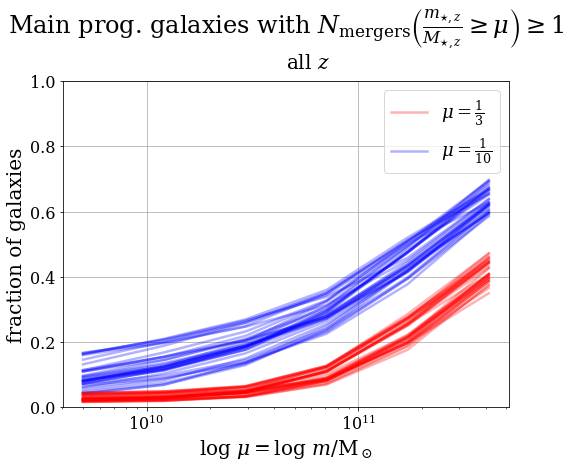

35


In [114]:
with h5py.File(fname,'r') as f:
    key='quench_dat'
    qdat=(f[key]).value
    
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
    
Nruns=qdat.shape[0]
for irun in xrange(Nruns):
    if irun==0:
        ax.plot(10.**qdat[irun][0][0][:-1],qdat[irun][0][1][:-1],'r',
                alpha=0.3,label='$\mu=\\frac{1}{3}$',lw=2.5)
        ax.plot(10.**qdat[irun][1][0][:-1],qdat[irun][1][1][:-1],'b',
                alpha=0.3,label='$\mu=\\frac{1}{10}$',lw=2.5)
    else:
        ax.plot(10.**qdat[irun][0][0][:-1],qdat[irun][0][1][:-1],'r',
                alpha=0.3,lw=2.5)
        ax.plot(10.**qdat[irun][1][0][:-1],qdat[irun][1][1][:-1],'b',
                alpha=0.3,lw=2.5)
ax.set_xlabel('log $\mu=\log\ m/$M$_\odot$')
ax.set_xscale('log')
ax.set_ylabel('fraction of galaxies')
ax.set_title('Main prog. galaxies with $N_\mathrm{mergers}'
             '\\left(\\frac{m_{\star,z}}{M_{\star,z}}\geq\mu\\right)\geq 1$',y=1.1)
ax.text(0.5,1.04,'all $z$',fontsize=20,transform=ax.transAxes)
ax.set_ylim(0,1)
#ax.set_ylim(1e-2,1)
#ax.set_yscale('log')
ax.legend()
plt.show()

print Nruns

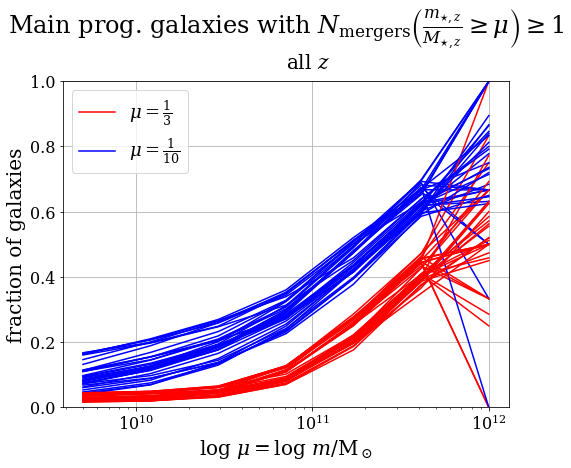

35


In [115]:
with h5py.File(fname,'r') as f:
    key='quench_dat'
    qdat=(f[key]).value
    
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
    
Nruns=qdat.shape[0]
for irun in xrange(Nruns):
    if irun==0:
        ax.plot(10.**qdat[irun][0][0],qdat[irun][0][1],'r',label='$\mu=\\frac{1}{3}$')
        ax.plot(10.**qdat[irun][1][0],qdat[irun][1][1],'b',label='$\mu=\\frac{1}{10}$')
    else:
        ax.plot(10.**qdat[irun][0][0],qdat[irun][0][1],'r')
        ax.plot(10.**qdat[irun][1][0],qdat[irun][1][1],'b')
ax.set_xlabel('log $\mu=\log\ m/$M$_\odot$')
ax.set_xscale('log')
ax.set_ylabel('fraction of galaxies')
ax.set_title('Main prog. galaxies with $N_\mathrm{mergers}'
             '\\left(\\frac{m_{\star,z}}{M_{\star,z}}\geq\mu\\right)\geq 1$',y=1.1)
ax.text(0.5,1.04,'all $z$',fontsize=20,transform=ax.transAxes)
ax.set_ylim(0,1)
ax.legend()
plt.show()

print Nruns

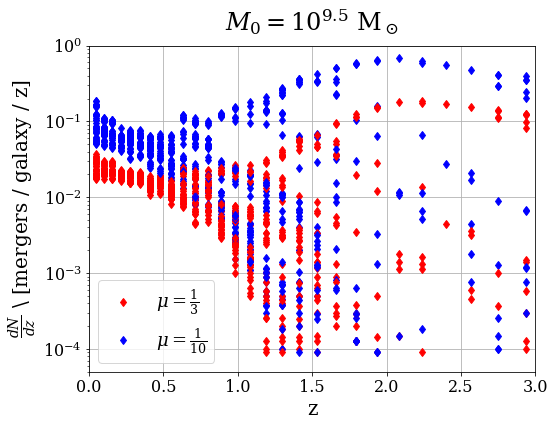

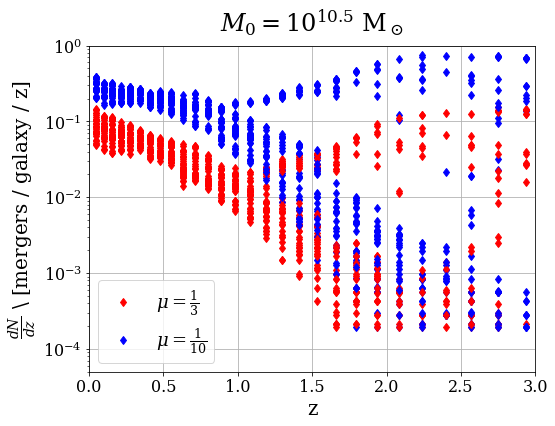

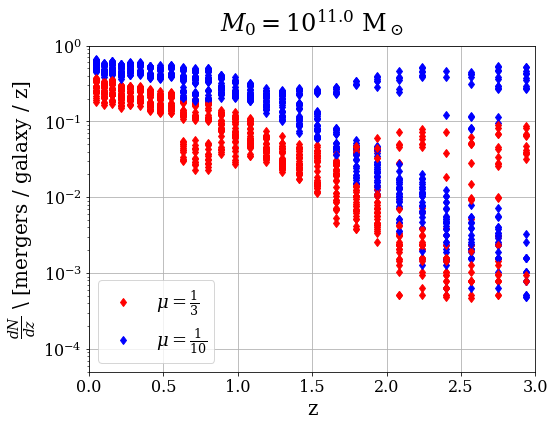

In [113]:
with h5py.File(fname,'r') as f:
    M0s=[9.5,10.5,11.]
    for M0 in M0s:
        key='{0:0.1f}dNdz_ofz'.format(M0)
        dat=(f[key]).value
        Nruns=dat.shape[0]

        fig=plt.figure(figsize=(8,6))
        ax=fig.add_subplot(111)
        
        for irun in range(Nruns):
            if irun==0:
                ax.plot(dat[irun][0][0],dat[irun][0][1],'rd',label='$\mu=\\frac{1}{3}$')
                ax.plot(dat[irun][1][0],dat[irun][1][1],'bd',label='$\mu=\\frac{1}{10}$')
            else:
                ax.plot(dat[irun][0][0],dat[irun][0][1],'rd')
                ax.plot(dat[irun][1][0],dat[irun][1][1],'bd')
        ax.set_yscale('log')
        ax.set_xlim(0,3)
        ax.set_ylim(5e-5,1)
        ax.set_xlabel('z')
        ax.set_ylabel('$\\frac{dN}{dz}$ \ [mergers / galaxy / z]')
        ax.set_title('$M_0=10^{{{0:0.1f}}}$ M$_\odot$'.format(M0))
        ax.legend()
        plt.show()

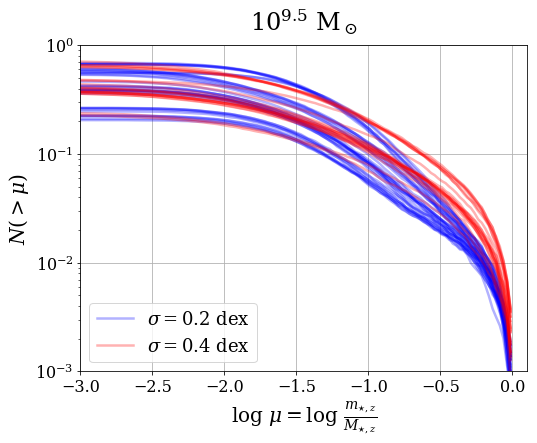

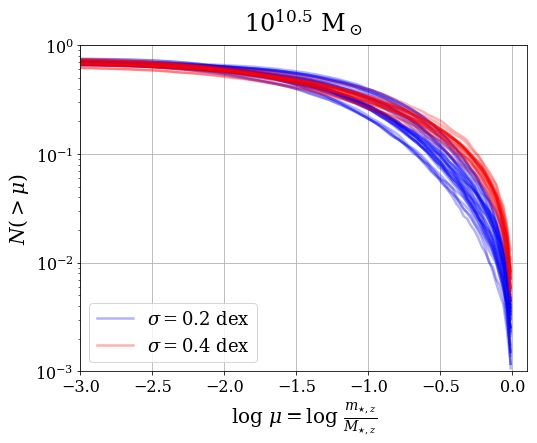

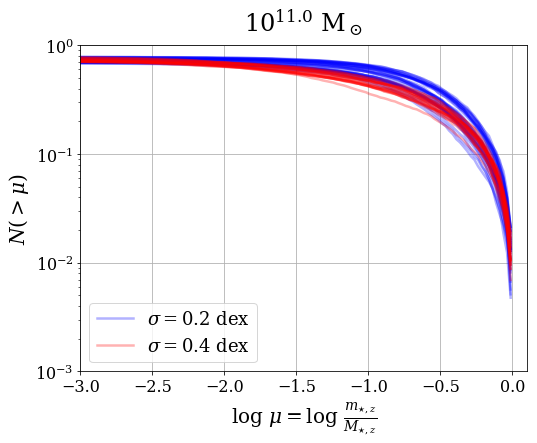

In [117]:
with h5py.File(fname,'r') as f:
    def Nplot(M0,col1,col2):
        fig=plt.figure(figsize=(8,6))
        ax=fig.add_subplot(111)
        key='{0:0.1f}dNdz_ofmu'.format(M0)
        dat=(f[key]).value
        Nruns=dat.shape[0]
        for irun in range(Nruns):
            if irun==1:
                ax.plot(dat[irun][0],dat[irun][1],col1,alpha=0.3,lw=2.5,
                    label='$\sigma=0.2$ dex')
            else:
                ax.plot(dat[irun][0],dat[irun][1],col1,alpha=0.3,lw=2.5)
        ax.set_yscale('log')
        ax.set_xlim(-3,0.1)
        ax.set_ylim(1e-3,1)
        ax.set_title('$10^{{{0:0.1f}}}$ M$_\odot$'.format(M0))
        ax.set_ylabel('$N(>\mu)$')
        ax.set_xlabel('log $\mu= $log '
                      '$\\frac{m_{\star,z}}{M_{\star,z}}$')
        with h5py.File(fname4,'r') as f4:
            dat=(f4[key]).value
            Nruns=dat.shape[0]
            for irun in range(Nruns):
                if irun==1:
                    ax.plot(dat[irun][0],dat[irun][1],col2,alpha=0.3,lw=2.5,
                            label='$\sigma=0.4$ dex')
                else:
                    ax.plot(dat[irun][0],dat[irun][1],col2,alpha=0.3,lw=2.5)
        ax.legend()
        plt.show()
    Nplot(9.5,'b','r')
    Nplot(10.5,'b','r')
    Nplot(11.,'b','r')

In [90]:
with h5py.File(fname,'r') as f:
    print f.keys()

[u'10.5dNdz_ofmu', u'10.5dNdz_ofz', u'11.0dNdz_ofmu', u'11.0dNdz_ofz', u'9.5dNdz_ofmu', u'9.5dNdz_ofz', u'Ns105', u'Ns11', u'Ns95', u'Ps_10.5M_-0.5-0.0', u'Ps_10.5M_-1.0--0.5', u'Ps_10.5M_-5.0--1.0', u'Ps_11.0M_-0.5-0.0', u'Ps_11.0M_-1.0--0.5', u'Ps_11.0M_-5.0--1.0', u'Ps_9.5M_-0.5-0.0', u'Ps_9.5M_-1.0--0.5', u'Ps_9.5M_-5.0--1.0', u'quench_dat']


In [193]:
def mak_all_panels_new(fname,legloc=0,
                       jigger=False):
    Mconds=[9.5,10.5,11.]
    rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]
    NMconds=len(Mconds)
    Nrngs=len(rngs)
    w=13
    h=4.*NMconds
    fig,axs=plt.subplots(NMconds,Nrngs,figsize=(w,h),sharex=True,sharey='row')
    fig.subplots_adjust(wspace=0.,hspace=0.)
    try:
        axs=axs.ravel()
    except AttributeError:
        pass
    axc=0
    axr=0
    axi=-1
    for Mcond in Mconds:
        axr+=1
        for rng in rngs:
            axc+=1
            axi+=1
            lo=rng[0]
            hi=rng[1]
            
            #Make the histogram for the data with scatter
            with h5py.File(fname,'r') as f:
                key='Ps_{0:0.1f}M_{1:0.1f}-{2:0.1f}'.format(Mcond,rng[0],rng[1])
                dat=(f[key]).value
            ############################
            axs[axi].step(dat[0][0],dat[0][1],
                           where='mid')
            noscat=merg_rates.hgram_dat_ft(tpm0,rng,Mcond,1,34)
            axs[axi].bar(noscat[0],noscat[1],align='center',width=1.)
            ############################
            axs[axi].set_yscale('log')
            if axr==1:
                if axc==1:
                    axs[axi].set_title('Micro mergers')
                elif axc==2:
                    axs[axi].set_title('Minor mergers')
                elif axc==3:
                    axs[axi].set_title('Major mergers')
                else:
                    raise ValueError('Title error')
            elif axc==2:
                    axs[axi].set_xlabel('Merger count')
            if axc==Nrngs:
                
                if axr==1:
                    axs[axi].legend(fontsize=15,loc=legloc,framealpha=0.9)
                ylim=axs[axi].get_ylim()
                logylo=np.log10(ylim[0])
                logyhi=np.log10(ylim[1])
                midy=10**((logylo+logyhi)/2.)          
    for i in range(9):
        axs[i].set_xticks(np.arange(dat[0][0].max()+2))
    for i in [0,3,6]:
        axs[i].set_ylabel('$P(\geq$count)',fontsize=18)
    axs[0].text(-4.5,midy,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                         ' M$_\odot$'.format(9.5),
                         fontsize=20,rotation='vertical',
                         verticalalignment='center')   
    axs[3].text(-4.5,midy,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                     ' M$_\odot$'.format(10.5),
                     fontsize=20,rotation='vertical',
                     verticalalignment='center')  
    axs[6].text(-4.5,midy,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                     ' M$_\odot$'.format(11.),
                     fontsize=20,rotation='vertical',
                     verticalalignment='center')  
    plt.show()
    return

0
Ps_9.5M_-5.0--1.0
1
Ps_9.5M_-1.0--0.5
2
Ps_9.5M_-0.5-0.0
3
Ps_10.5M_-5.0--1.0
4
Ps_10.5M_-1.0--0.5
5
Ps_10.5M_-0.5-0.0
6
Ps_11.0M_-5.0--1.0
7
Ps_11.0M_-1.0--0.5
8
Ps_11.0M_-0.5-0.0


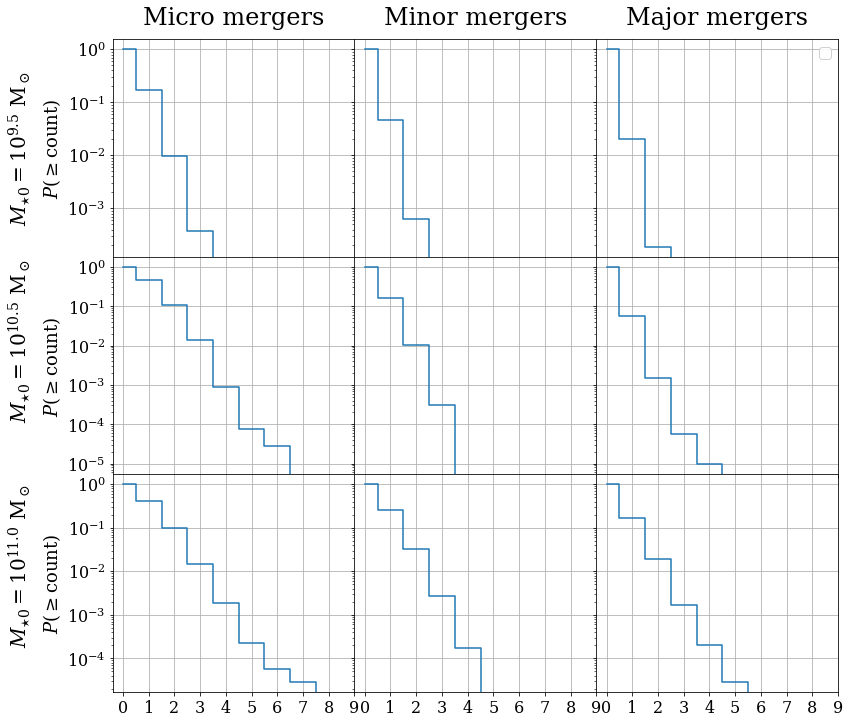

In [194]:
mak_all_panels_new(fname)

9.5
Ps_9.5M_-5.0--1.0


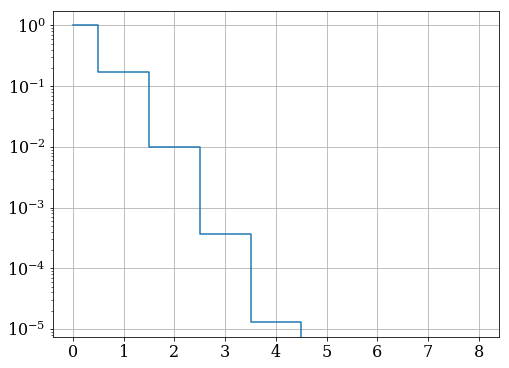

9.5
Ps_9.5M_-1.0--0.5


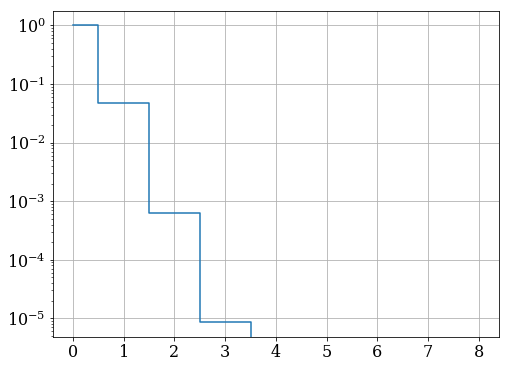

9.5
Ps_9.5M_-0.5-0.0


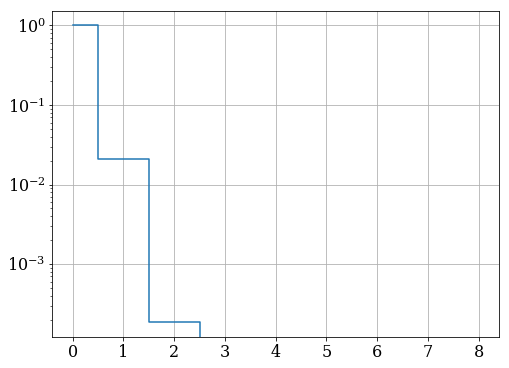

10.5
Ps_10.5M_-5.0--1.0


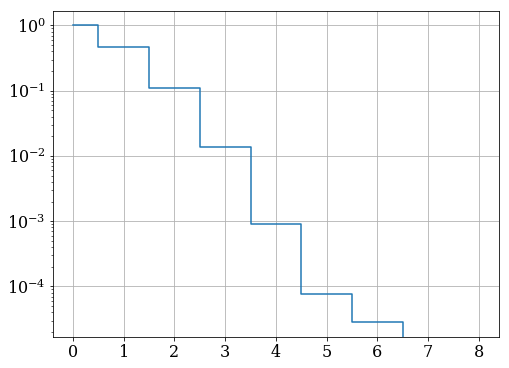

10.5
Ps_10.5M_-1.0--0.5


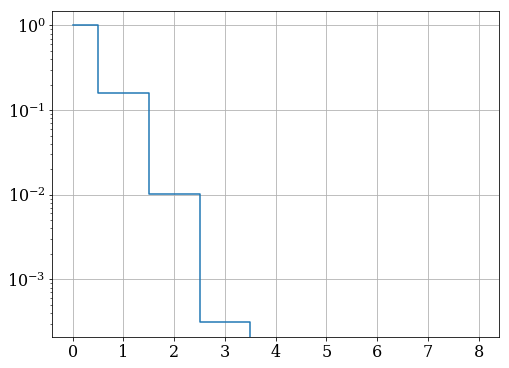

10.5
Ps_10.5M_-0.5-0.0


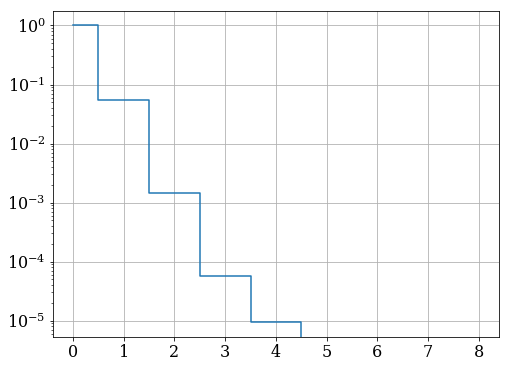

11.0
Ps_11.0M_-5.0--1.0


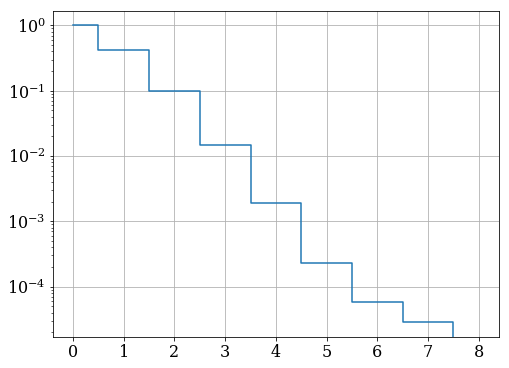

11.0
Ps_11.0M_-1.0--0.5


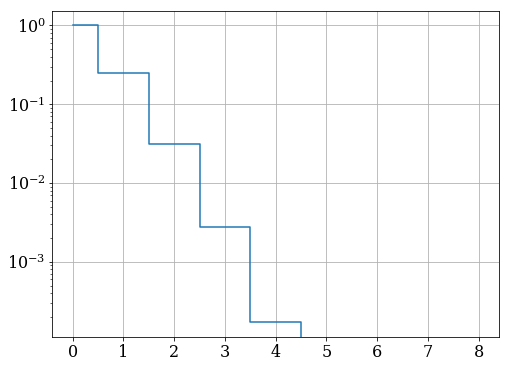

11.0
Ps_11.0M_-0.5-0.0


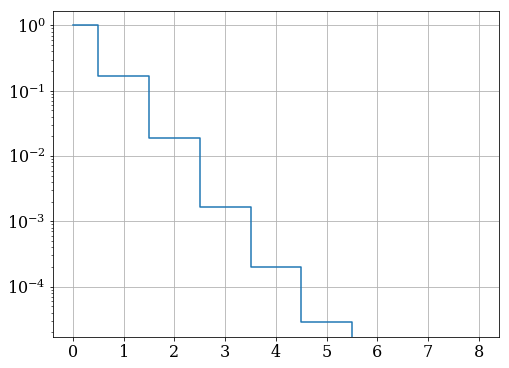

In [127]:
with h5py.File(fname,'r') as f:
    for Mcond in [9.5,10.5,11.]:
        for i,rng in enumerate([[-5.,-1.],[-1.,-0.5],[-0.5,0.]]):
            print Mcond
            key='Ps_{0:0.1f}M_{1:0.1f}-{2:0.1f}'.format(Mcond,rng[0],rng[1])
            print key
            dat=(f[key]).value
            fig=plt.figure(figsize=(8,6))
            ax=fig.add_subplot(111)
            ax.step(dat[0][0],dat[0][1],where='mid')
            ax.set_yscale('log')
            plt.show()